In [1]:
import pandas as pd
import sensormotion as sm
import seaborn as sb
import numpy as np

In [155]:
accel = pd.read_csv('data/100LHaccel.csv')

In [156]:
accel.head()

,epoch (ms),time (-08:00),elapsed (s),X-Axis (g),Y-Axis (g),Z-Axis (g)
0,1573014683447,2019-11-05T20:31:23.447,0.000,0.149,-0.789,-0.283
1,1573014683487,2019-11-05T20:31:23.487,0.040,0.176,-0.806,-0.251
2,1573014683528,2019-11-05T20:31:23.528,0.081,0.202,-0.803,-0.309
3,1573014683567,2019-11-05T20:31:23.567,0.120,0.236,-0.830,-0.382
4,1573014683608,2019-11-05T20:31:23.608,0.161,0.289,-0.829,-0.436


In [157]:
accel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3666 entries, 0 to 3665
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   epoch (ms)     3666 non-null   int64  
 1   time (-08:00)  3666 non-null   object 
 2   elapsed (s)    3666 non-null   float64
 3   X-Axis (g)     3666 non-null   float64
 4   Y-Axis (g)     3666 non-null   float64
 5   Z-Axis (g)     3666 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 172.0+ KB


In [158]:
def filter_data(x):
    b, a = sm.signal.build_filter(frequency = 10,
                              sample_rate = 100,
                              filter_type = 'low',
                              filter_order = 4)

    return sm.signal.filter_signal(b, a, signal = x)

In [159]:
def summarize_data(accel):
    print("-----SESSION SUMMARY START-----")
    
    duration = int(len(accel) / 25)
    print("Session length : {} seconds".format(duration))
    
    accel['mag'] = np.sqrt(accel['X-Axis (g)']*accel['X-Axis (g)'] + accel['Y-Axis (g)']*accel['Y-Axis (g)'] + accel['Z-Axis (g)']*accel['Z-Axis (g)']) - 1
    mag = accel['mag']
    t = accel['epoch (ms)']
    mag_filtered = filter_data(mag)
    peak_times, peak_values = sm.peak.find_peaks(time=t, signal=mag_filtered,
                                             peak_type='peak',
                                             min_val=0.5, min_dist=0,
                                             plot=True)
    print("Number of punches detected : {}".format(len(peak_values)))
    for i, each in enumerate(peak_values):
        print("Punch {} Magnitude {} G's".format(i + 1,round(each,2)))
    print("Total G's pulled {}".format(np.sum(peak_values)))
    
    return peak_times, peak_values

-----SESSION SUMMARY START-----
Session length : 146 seconds


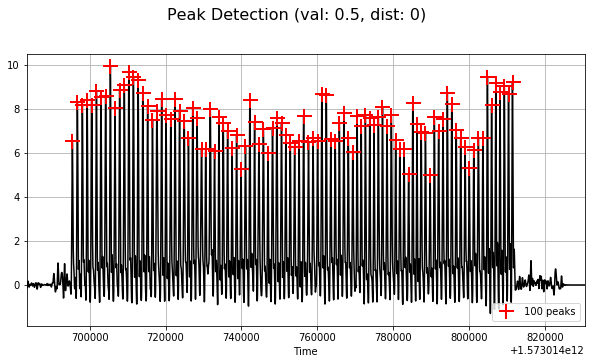

Number of punches detected : 100
Punch 1 Magnitude 6.57 G's
Punch 2 Magnitude 8.32 G's
Punch 3 Magnitude 8.16 G's
Punch 4 Magnitude 8.41 G's
Punch 5 Magnitude 8.19 G's
Punch 6 Magnitude 8.82 G's
Punch 7 Magnitude 8.55 G's
Punch 8 Magnitude 8.61 G's
Punch 9 Magnitude 9.94 G's
Punch 10 Magnitude 8.04 G's
Punch 11 Magnitude 8.88 G's
Punch 12 Magnitude 9.09 G's
Punch 13 Magnitude 9.7 G's
Punch 14 Magnitude 9.46 G's
Punch 15 Magnitude 9.31 G's
Punch 16 Magnitude 8.73 G's
Punch 17 Magnitude 8.16 G's
Punch 18 Magnitude 7.5 G's
Punch 19 Magnitude 7.93 G's
Punch 20 Magnitude 8.44 G's
Punch 21 Magnitude 7.72 G's
Punch 22 Magnitude 7.56 G's
Punch 23 Magnitude 8.47 G's
Punch 24 Magnitude 7.91 G's
Punch 25 Magnitude 7.48 G's
Punch 26 Magnitude 6.7 G's
Punch 27 Magnitude 8.06 G's
Punch 28 Magnitude 7.6 G's
Punch 29 Magnitude 6.17 G's
Punch 30 Magnitude 6.19 G's
Punch 31 Magnitude 7.99 G's
Punch 32 Magnitude 6.1 G's
Punch 33 Magnitude 7.65 G's
Punch 34 Magnitude 7.37 G's
Punch 35 Magnitude 6.99 G's
P

In [160]:
peak_times, peak_values = summarize_data(accel)

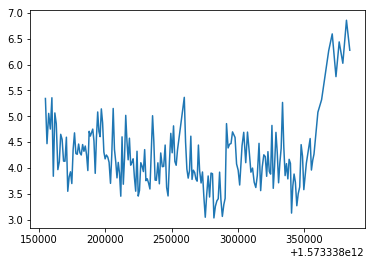

In [140]:
sb.lineplot(peak_times,peak_values)

In [19]:
accel['mag'] = np.sqrt(accel['X-Axis (g)']*accel['X-Axis (g)'] + accel['Y-Axis (g)']*accel['Y-Axis (g)'] + accel['Z-Axis (g)']*accel['Z-Axis (g)']) - 1

In [20]:
accel

,epoch (ms),time (-08:00),elapsed (s),X-Axis (g),Y-Axis (g),Z-Axis (g),mag
0,1572985339146,2019-11-05T12:22:19.146,0.000,-0.488,-1.019,0.720,0.339741
1,1572985339186,2019-11-05T12:22:19.186,0.040,-0.813,-0.039,0.786,0.131497
2,1572985339227,2019-11-05T12:22:19.227,0.081,-1.275,-0.112,0.890,0.558932
3,1572985339266,2019-11-05T12:22:19.266,0.120,-1.470,0.133,0.874,0.715361
4,1572985339306,2019-11-05T12:22:19.306,0.160,-0.807,0.912,0.669,0.389444
...,...,...,...,...,...,...,...
429,1572985356362,2019-11-05T12:22:36.362,17.216,-1.042,0.529,0.355,0.221323
430,1572985356403,2019-11-05T12:22:36.403,17.257,-1.288,-0.179,0.133,0.307163
431,1572985356444,2019-11-05T12:22:36.444,17.298,-1.179,-0.558,-0.083,0.307017
432,1572985356482,2019-11-05T12:22:36.482,17.336,-0.938,-0.642,-0.062,0.138355


In [21]:
x = accel['mag']
t = accel['epoch (ms)']
time = t

In [85]:
b, a = sm.signal.build_filter(frequency=10,
                              sample_rate=100,
                              filter_type='low',
                              filter_order=1)

x_filtered1 = sm.signal.filter_signal(b, a, signal=x)

In [108]:
b, a = sm.signal.build_filter(frequency=10,
                              sample_rate=100,
                              filter_type='low',
                              filter_order=2)

x_filtered2 = sm.signal.filter_signal(b, a, signal=x)

In [91]:
b, a = sm.signal.build_filter(frequency=10,
                              sample_rate=100,
                              filter_type='low',
                              filter_order=3)

x_filtered3 = sm.signal.filter_signal(b, a, signal=x)

In [92]:
b, a = sm.signal.build_filter(frequency=10,
                              sample_rate=100,
                              filter_type='low',
                              filter_order=4)

x_filtered4 = sm.signal.filter_signal(b, a, signal=x)

In [93]:
b, a = sm.signal.build_filter(frequency=10,
                              sample_rate=100,
                              filter_type='low',
                              filter_order=5)

x_filtered5 = sm.signal.filter_signal(b, a, signal=x)

In [79]:
x_filtered[0]

0.3394794065370914

In [80]:
x[0]

0.33974064654320313

In [81]:
b

array([0.24523728, 0.24523728])

In [82]:
a

array([ 1.        , -0.50952545])

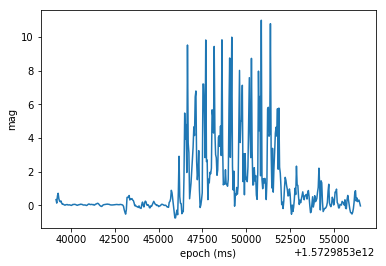

In [83]:
sb.lineplot(t,x)

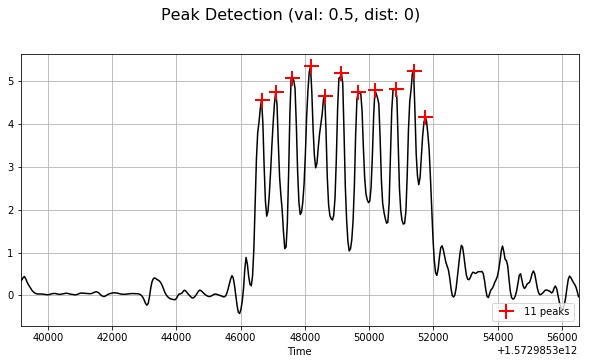

In [87]:
peak_times, peak_values = sm.peak.find_peaks(time=t, signal=x_filtered1,
                                             peak_type='peak',
                                             min_val=0.5, min_dist=0,
                                             plot=True)

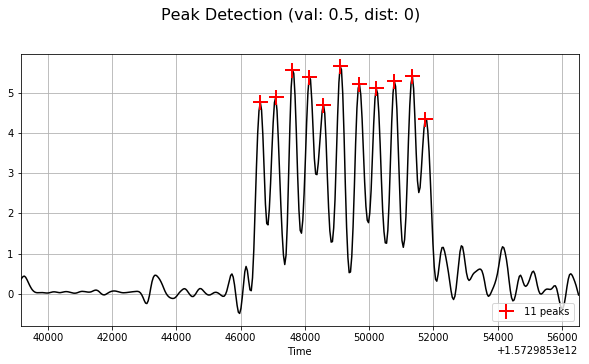

In [109]:
peak_times, peak_values = sm.peak.find_peaks(time=t, signal=x_filtered2,
                                             peak_type='peak',
                                             min_val=0.5, min_dist=0,
                                             plot=True)

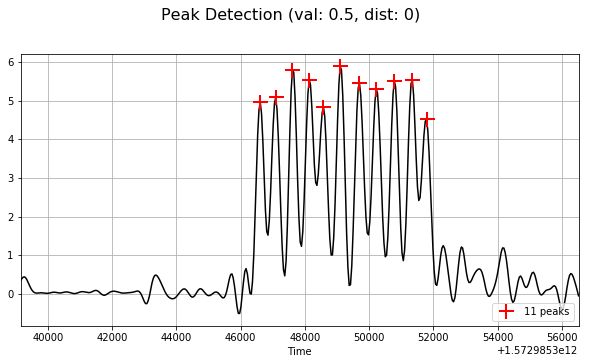

In [94]:
peak_times, peak_values = sm.peak.find_peaks(time=t, signal=x_filtered3,
                                             peak_type='peak',
                                             min_val=0.5, min_dist=0,
                                             plot=True)

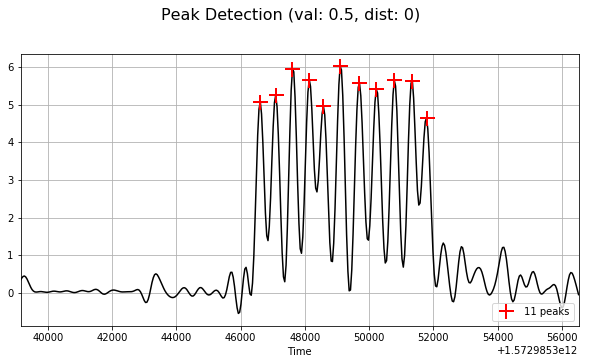

In [95]:
peak_times, peak_values = sm.peak.find_peaks(time=t, signal=x_filtered4,
                                             peak_type='peak',
                                             min_val=0.5, min_dist=0,
                                             plot=True)

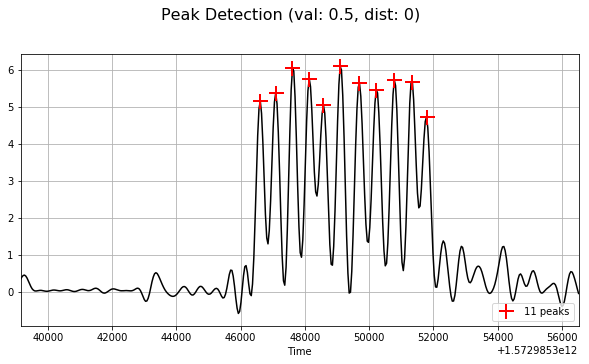

In [96]:
peak_times, peak_values = sm.peak.find_peaks(time=t, signal=x_filtered5,
                                             peak_type='peak',
                                             min_val=0.5, min_dist=0,
                                             plot=True)

In [30]:
peak_times

array([1572985346611, 1572985347091, 1572985347614, 1572985348136,
       1572985348577, 1572985349098, 1572985349700, 1572985350222,
       1572985350784, 1572985351347, 1572985351788])

In [31]:
peak_values

array([5.08027686, 5.25209867, 5.94663514, 5.66643847, 4.96476475,
       6.01848068, 5.58241197, 5.41010325, 5.6492094 , 5.62927829,
       4.64670457])

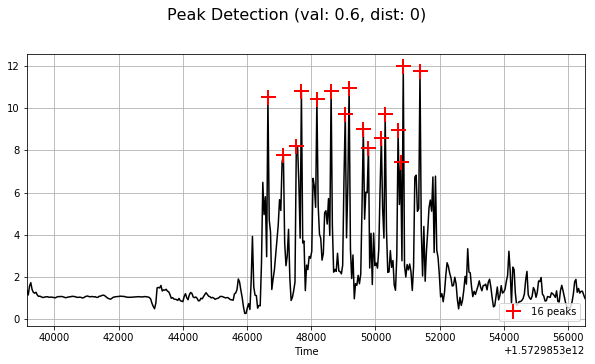

In [18]:
peak_times, peak_values = sm.peak.find_peaks(time=t, signal=x,
                                             peak_type='peak',
                                             min_val=0.6, min_dist=0,
                                             plot=True)